# load library

In [ ]:
from google.colab import drive
drive.mount('/MultiClusterGAN')
%cd /MultiClusterGAN/MyDrive/CNS/
%pip install  umap-learn scanpy leidenalg

Drive already mounted at /MultiClusterGAN; to attempt to forcibly remount, call drive.mount("/MultiClusterGAN", force_remount=True).
/MultiClusterGAN/MyDrive/CNS


In [ ]:
	pip install harmonypy


In [ ]:
# Loading the Packages

%reload_ext autoreload
%autoreload 2

import os
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

from tifffile import tifffile
from scipy import ndimage

# from starmap.obj import STARMapDataset, load_data
# import starmap.analyze as anz
# import starmap.viz as viz
# import starmap.sc_util as su
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm
from anndata import AnnData
from sklearn.cluster import AgglomerativeClustering


In [ ]:
# Colormap related
import colorsys
from random import shuffle

def intervals(parts, start_point, end_point):
    duration = end_point - start_point
    part_duration = duration / parts
    return [((i * part_duration + (i + 1) * part_duration)/2) + start_point for i in range(parts)]

## Input

In [ ]:
sample_names = {
    'spinalcord',
    'well01brain',
    'well01OB',
    'well03',
    'well04',
    'well05',
    'well06',
    'well07',
    'well08',
    'well09',
    'well10',
    'well11',
    'well1_5',
    'well2_5',
    'well3_5',
    'well7_5',
    'well10_5',
    'sagittal1',
    'sagittal2',
    'sagittal3'
}

In [ ]:
# cmap=np.random.rand(76,3)
# adata1=sc.read_h5ad('adata_leiden_0212_final.h5ad')
# adata1=sc.read_h5ad('adata_leiden_0212_final_0_9.h5ad')
adata_tissue_revise=sc.read_h5ad('data/tissue_region_revise.h5ad')

# adata1_new=adata1.copy()
# adata1_new.obs['revised_tissue']=adata1.obs['tissue']

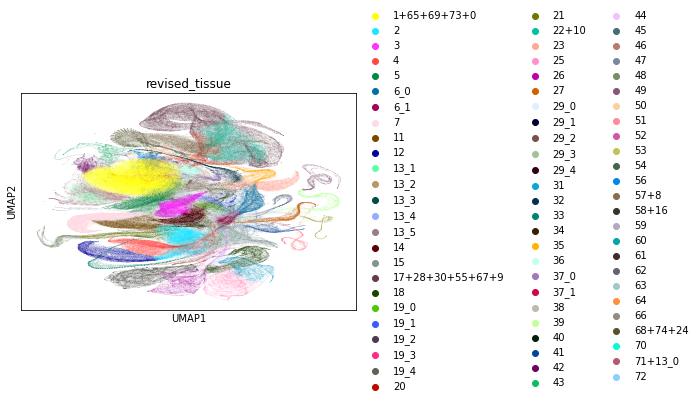

In [ ]:
sc.pl.umap(adata_tissue_revise,color='revised_tissue')

Combine 13_3 into 0?; 13_4 into 0?; 13_5 into 13_0?

In [ ]:
test=adata_tissue_revise.obs.loc[(adata_tissue_revise.obs['revised_tissue']=='1+65+69+73+0') |(adata_tissue_revise.obs['revised_tissue']=='13_3') | (adata_tissue_revise.obs['revised_tissue']=='13_4'),:]

adata_tissue_revise.obs['revised_tissue'] = adata_tissue_revise.obs['revised_tissue'].astype('str')
adata_tissue_revise.obs.loc[test.index,'revised_tissue']= '1+65+69+73+0-merge'

In [ ]:
test=adata_tissue_revise.obs.loc[(adata_tissue_revise.obs['revised_tissue']=='13_0') |(adata_tissue_revise.obs['revised_tissue']=='13_5'),:]

adata_tissue_revise.obs['revised_tissue'] = adata_tissue_revise.obs['revised_tissue'].astype('str')
adata_tissue_revise.obs.loc[test.index,'revised_tissue']= '13_0-merge'

Combine 19-3 and 19-4 into 19-0

In [ ]:
test=adata_tissue_revise.obs.loc[(adata_tissue_revise.obs['revised_tissue']=='19_0') |(adata_tissue_revise.obs['revised_tissue']=='19_4') | (adata_tissue_revise.obs['revised_tissue']=='19_3'),:]

adata_tissue_revise.obs['revised_tissue'] = adata_tissue_revise.obs['revised_tissue'].astype('str')
adata_tissue_revise.obs.loc[test.index,'revised_tissue']= '19-merge'

Combine 29_2, 29_3, 29_4 into 29_0

In [ ]:
test=adata_tissue_revise.obs.loc[(adata_tissue_revise.obs['revised_tissue']=='29_2') | (adata_tissue_revise.obs['revised_tissue']=='29_3') | (adata_tissue_revise.obs['revised_tissue']=='29_4') | (adata_tissue_revise.obs['revised_tissue']=='29_0') ,:]

adata_tissue_revise.obs['revised_tissue'] = adata_tissue_revise.obs['revised_tissue'].astype('str')
adata_tissue_revise.obs.loc[test.index,'revised_tissue']= '29-merge'

... storing 'revised_tissue' as categorical


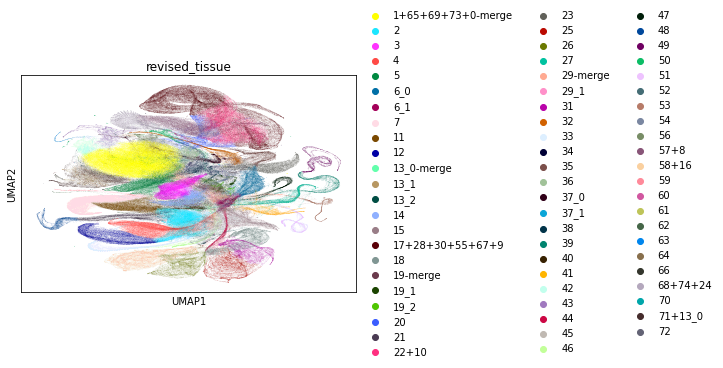

In [ ]:
sc.pl.umap(adata_tissue_revise,color='revised_tissue')

recluster OB

In [ ]:
test=adata_tissue_revise.obs.loc[(adata_tissue_revise.obs['revised_tissue']=='58+16') | (adata_tissue_revise.obs['revised_tissue']=='18') | (adata_tissue_revise.obs['revised_tissue']=='26') | (adata_tissue_revise.obs['revised_tissue']=='64') ,:]

adata_tissue_revise.obs['revised_tissue'] = adata_tissue_revise.obs['revised_tissue'].astype('str')
adata_tissue_revise.obs.loc[test.index,'revised_tissue']= 'OB-merge'

In [ ]:
OB_merge=adata_tissue_revise[adata_tissue_revise.obs['revised_tissue']== 'OB-merge',:].copy()

In [ ]:
import scanpy.external as sce
sc.tl.pca(OB_merge)
sce.pp.harmony_integrate(OB_merge, 'sample')
sc.pp.neighbors(OB_merge,use_rep='X_pca_harmony', n_neighbors=10, n_pcs=40)
sc.tl.umap(OB_merge)

2022-02-27 21:43:14,812 - harmonypy - INFO - Iteration 1 of 10
2022-02-27 21:43:50,671 - harmonypy - INFO - Iteration 2 of 10
2022-02-27 21:44:25,364 - harmonypy - INFO - Iteration 3 of 10
2022-02-27 21:45:02,190 - harmonypy - INFO - Converged after 3 iterations


In [ ]:
sc.tl.leiden(OB_merge,resolution=0.01)

... storing 'revised_tissue' as categorical


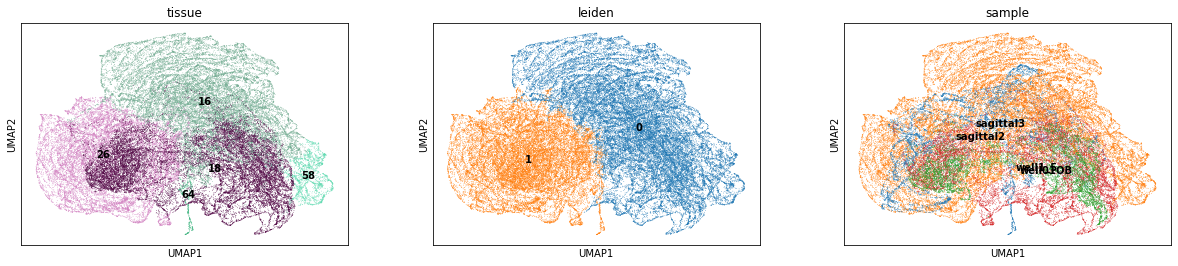

In [ ]:
sc.pl.umap(OB_merge,color=['tissue','leiden','sample'],legend_loc='on data')

In [ ]:
focus_sample_names=['well1_5','sagittal3']

In [ ]:
adata1=adata_tissue_revise

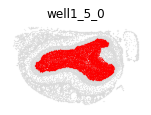

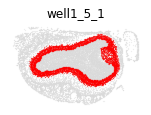

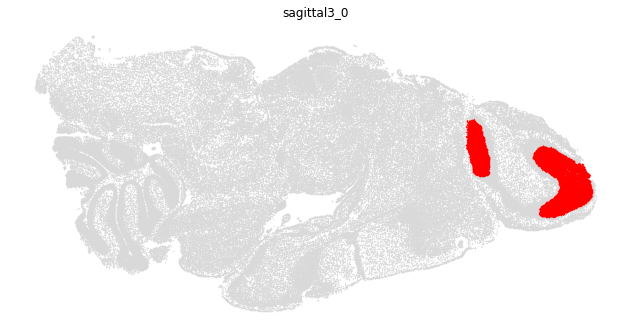

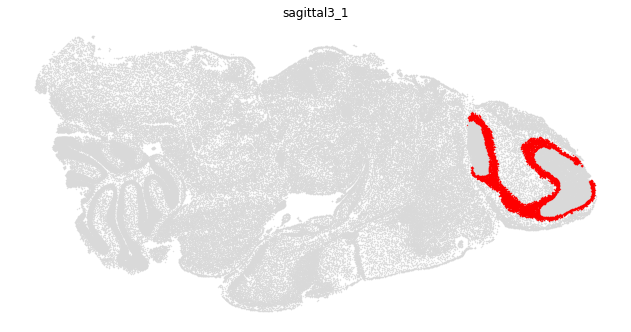

In [ ]:
for i in focus_sample_names:
  for j in OB_merge.obs['leiden'].unique():
    plt.figure(figsize=(max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/7000,max(adata1.obs.loc[adata1.obs['sample']== i,'col'])/7000,))
    plt.scatter(adata1.obs.loc[adata1.obs['sample']== i,'row'],adata1.obs.loc[adata1.obs['sample']== i,'col'],s=max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/600000,color=[0.85,0.85,0.85])

    adata1_id_j=OB_merge[OB_merge.obs['leiden']==j,:].copy()
    plt.scatter(adata1_id_j.obs.loc[adata1_id_j.obs['sample']== i,'row'],adata1_id_j.obs.loc[adata1_id_j.obs['sample']== i,'col'],s=max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/600000,color='red')
    plt.axis('off')
    plt.title(i+'_'+j)

In [ ]:
adata_tissue_revise.obs['revised_tissue'] = adata_tissue_revise.obs['revised_tissue'].astype('str')
adata_tissue_revise.obs.loc[OB_merge.obs.index,'revised_tissue']= OB_merge.obs['leiden'].apply(lambda x: 'OB_merge'+'_'+x)

'57+8','17+28+30+55+67+9','22+10'

In [ ]:
test=adata_tissue_revise.obs.loc[(adata_tissue_revise.obs['revised_tissue']=='57+8') | (adata_tissue_revise.obs['revised_tissue']=='17+28+30+55+67+9') | (adata_tissue_revise.obs['revised_tissue']=='22+10') ,:]

adata_tissue_revise.obs['revised_tissue'] = adata_tissue_revise.obs['revised_tissue'].astype('str')
adata_tissue_revise.obs.loc[test.index,'revised_tissue']= 'CB-merge'

In [ ]:
OB_merge=adata_tissue_revise[adata_tissue_revise.obs['revised_tissue']== 'CB-merge',:].copy()

In [ ]:
import scanpy.external as sce
sc.tl.pca(OB_merge)
sce.pp.harmony_integrate(OB_merge, 'sample')


2022-02-27 21:48:12,010 - harmonypy - INFO - Iteration 1 of 10
2022-02-27 21:49:49,484 - harmonypy - INFO - Iteration 2 of 10
2022-02-27 21:51:26,641 - harmonypy - INFO - Iteration 3 of 10
2022-02-27 21:53:05,290 - harmonypy - INFO - Converged after 3 iterations


In [ ]:
sc.pp.neighbors(OB_merge,use_rep='X_pca_harmony', n_neighbors=10, n_pcs=40)
sc.tl.umap(OB_merge)

In [ ]:
sc.tl.leiden(OB_merge,resolution=0.03)

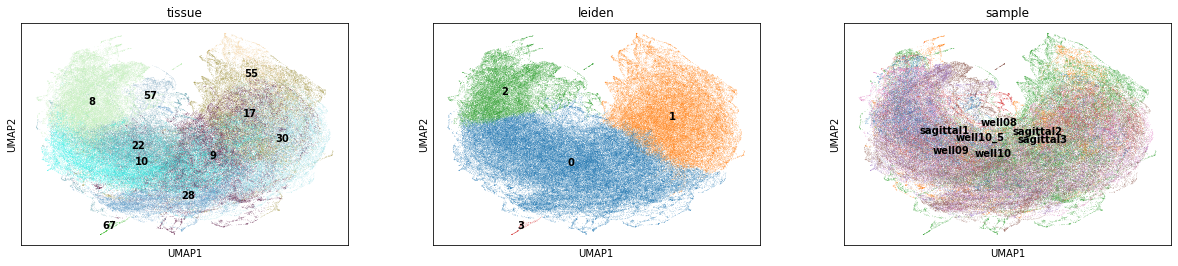

In [ ]:
sc.pl.umap(OB_merge,color=['tissue','leiden','sample'],legend_loc='on data')

In [ ]:
focus_sample_names=['well10','well10_5','well09','sagittal1','sagittal3']

In [ ]:
adata1=adata_tissue_revise

In [ ]:
OB_merge.obs['leiden']=OB_merge.obs['leiden'].astype('str')
OB_merge.obs.loc[OB_merge.obs['leiden']=='3','leiden']='0'

In [ ]:
for i in focus_sample_names:
  for j in OB_merge.obs['leiden'].unique():
    plt.figure(figsize=(max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/7000,max(adata1.obs.loc[adata1.obs['sample']== i,'col'])/7000,))
    plt.scatter(adata1.obs.loc[adata1.obs['sample']== i,'row'],adata1.obs.loc[adata1.obs['sample']== i,'col'],s=max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/600000,color=[0.85,0.85,0.85])

    adata1_id_j=OB_merge[OB_merge.obs['leiden']==j,:].copy()
    plt.scatter(adata1_id_j.obs.loc[adata1_id_j.obs['sample']== i,'row'],adata1_id_j.obs.loc[adata1_id_j.obs['sample']== i,'col'],s=max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/600000,color='red')
    plt.axis('off')
    plt.title(i+'_'+j)

In [ ]:
adata_tissue_revise.obs['revised_tissue'] = adata_tissue_revise.obs['revised_tissue'].astype('str')
adata_tissue_revise.obs.loc[OB_merge.obs.index,'revised_tissue']= OB_merge.obs['leiden'].apply(lambda x: 'CB_merge'+'_'+x)

'39','49'

In [ ]:
test=adata_tissue_revise.obs.loc[(adata_tissue_revise.obs['revised_tissue']=='39') | (adata_tissue_revise.obs['revised_tissue']=='49')  ,:]

adata_tissue_revise.obs['revised_tissue'] = adata_tissue_revise.obs['revised_tissue'].astype('str')
adata_tissue_revise.obs.loc[test.index,'revised_tissue']= 'DG-merge'

In [ ]:
OB_merge=adata_tissue_revise[adata_tissue_revise.obs['revised_tissue']== 'DG-merge',:].copy()

In [ ]:
pip install scanorama

     |████████████████████████████████| 646 kB 32.4 MB/s 
  Created wheel for annoy: filename=annoy-1.17.0-cp37-cp37m-linux_x86_64.whl size=391676 sha256=b91b7aadad008bb1ea0d4076e2157798d930a70e6c036dcf9425b70af9570e8e
  Stored in directory: /root/.cache/pip/wheels/4f/e8/1e/7cc9ebbfa87a3b9f8ba79408d4d31831d67eea918b679a4c07
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11375 sha256=911572ec006578c5faebe312eded43c9d1ac4f32dea035532ad7544288ea0221
  Stored in directory: /root/.cache/pip/wheels/93/08/0c/1b9866c35c8d3f136d100dfe88036a32e0795437daca089f70
Successfully built annoy fbpca


In [ ]:
import scanpy.external as sce
sc.tl.pca(OB_merge)
# sce.pp.harmony_integrate(OB_merge, 'sample')
sce.pp.scanorama_integrate(OB_merge, 'sample')

[[0.         0.21176471 0.04411765 0.20882353 0.13235294 0.05882353
  0.13823529 0.09411765]
 [0.         0.         0.44692082 0.15835777 0.15835777 0.04969291
  0.37394068 0.20014663]
 [0.         0.         0.         0.12903226 0.25337243 0.25395894
  0.23305085 0.36715543]
 [0.         0.         0.         0.         0.23118432 0.13735343
  0.23516949 0.16296928]
 [0.         0.         0.         0.         0.         0.46063652
  0.23411017 0.27901024]
 [0.         0.         0.         0.         0.         0.
  0.05826271 0.32607482]
 [0.         0.         0.         0.         0.         0.
  0.         0.2404661 ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]
Processing datasets well07 <=> well7_5
Processing datasets well06 <=> well11
Processing datasets well06 <=> well05
Processing datasets well11 <=> sagittal1
Processing datasets well7_5 <=> sagittal1
Processing datasets well07 <=> sagittal1
Processing datasets well11 <=> well7_5
P

In [ ]:
sc.pp.neighbors(OB_merge,use_rep='X_scanorama', n_neighbors=10, n_pcs=40)
sc.tl.umap(OB_merge)

In [ ]:
sc.tl.leiden(OB_merge,resolution=0.01)

... storing 'leiden' as categorical


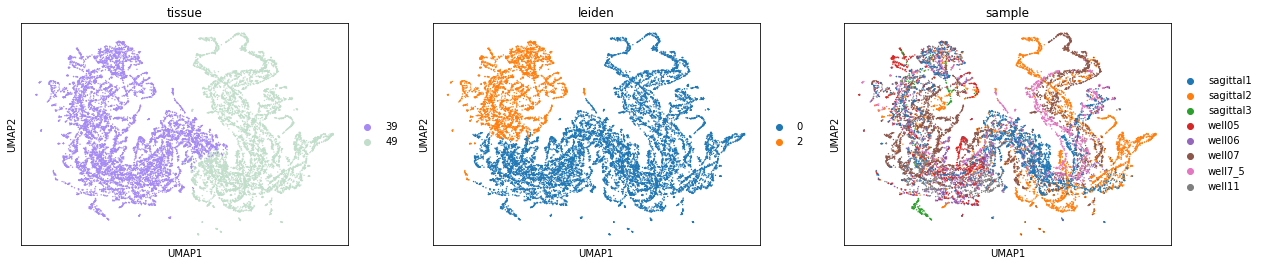

In [ ]:
sc.pl.umap(OB_merge,color=['tissue','leiden','sample'])

In [ ]:
focus_sample_names=['well06','well07','well7_5','well11','sagittal1','sagittal2']

In [ ]:
adata1=adata_tissue_revise

In [ ]:
OB_merge.obs['leiden']=OB_merge.obs['leiden'].astype('str')
OB_merge.obs.loc[OB_merge.obs['leiden']=='1','leiden']='0'
OB_merge.obs.loc[OB_merge.obs['leiden']=='3','leiden']='0'
OB_merge.obs.loc[OB_merge.obs['leiden']=='4','leiden']='0'

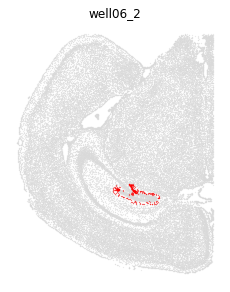

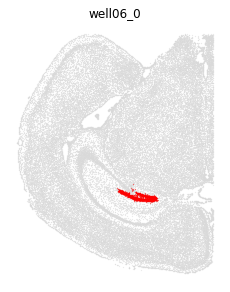

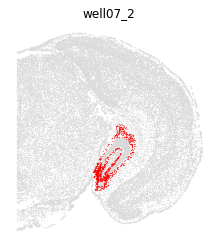

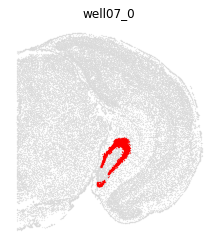

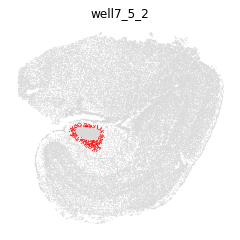

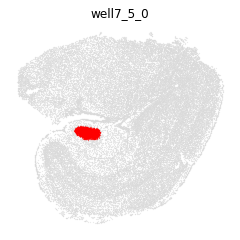

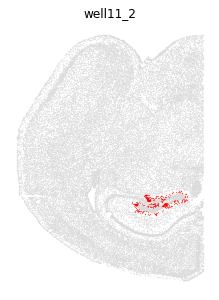

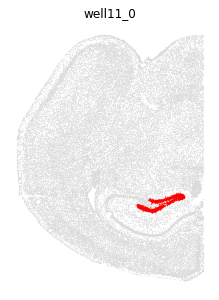

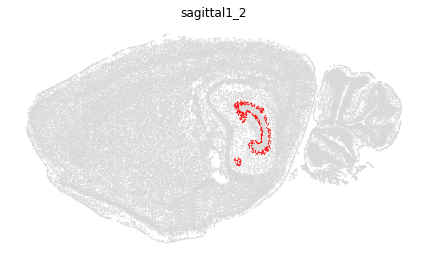

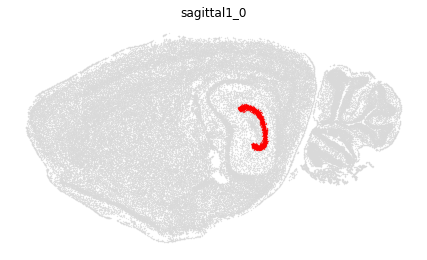

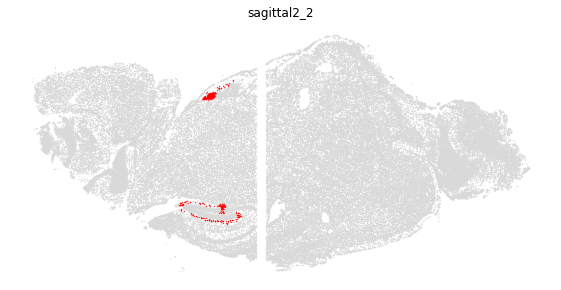

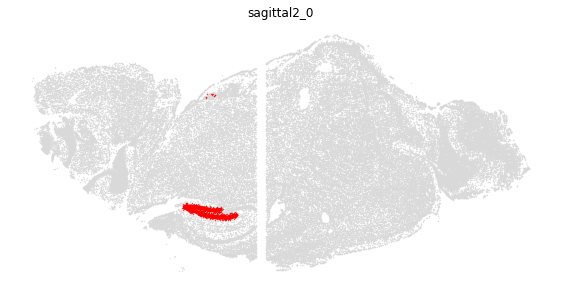

In [ ]:
for i in focus_sample_names:
  for j in OB_merge.obs['leiden'].unique():
    plt.figure(figsize=(max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/7000,max(adata1.obs.loc[adata1.obs['sample']== i,'col'])/7000,))
    plt.scatter(adata1.obs.loc[adata1.obs['sample']== i,'row'],adata1.obs.loc[adata1.obs['sample']== i,'col'],s=max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/600000,color=[0.85,0.85,0.85])

    adata1_id_j=OB_merge[OB_merge.obs['leiden']==j,:].copy()
    plt.scatter(adata1_id_j.obs.loc[adata1_id_j.obs['sample']== i,'row'],adata1_id_j.obs.loc[adata1_id_j.obs['sample']== i,'col'],s=max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/600000,color='red')
    plt.axis('off')
    plt.title(i+'_'+j)

In [ ]:
adata_tissue_revise.obs['revised_tissue'] = adata_tissue_revise.obs['revised_tissue'].astype('str')
adata_tissue_revise.obs.loc[OB_merge.obs.index,'revised_tissue']= OB_merge.obs['leiden'].apply(lambda x: 'DG_merge'+'_'+x)

'29-merge','29-1','6-0','6-1','35',

In [ ]:
test=adata_tissue_revise.obs.loc[(adata_tissue_revise.obs['revised_tissue']=='29-merge') | (adata_tissue_revise.obs['revised_tissue']=='29_1') | (adata_tissue_revise.obs['revised_tissue']=='6_0') | (adata_tissue_revise.obs['revised_tissue']=='6_1') | (adata_tissue_revise.obs['revised_tissue']=='35'),:]

adata_tissue_revise.obs['revised_tissue'] = adata_tissue_revise.obs['revised_tissue'].astype('str')
adata_tissue_revise.obs.loc[test.index,'revised_tissue']= 'Layer1+hippo-merge'

In [ ]:
OB_merge=adata_tissue_revise[adata_tissue_revise.obs['revised_tissue']== 'Layer1+hippo-merge',:].copy()

In [ ]:
import scanpy.external as sce
sc.tl.pca(OB_merge)
sce.pp.harmony_integrate(OB_merge, 'sample')


2022-02-27 22:27:05,351 - harmonypy - INFO - Iteration 1 of 10
2022-02-27 22:27:48,081 - harmonypy - INFO - Iteration 2 of 10
2022-02-27 22:28:31,054 - harmonypy - INFO - Iteration 3 of 10
2022-02-27 22:29:11,942 - harmonypy - INFO - Iteration 4 of 10
2022-02-27 22:29:56,388 - harmonypy - INFO - Iteration 5 of 10
2022-02-27 22:30:39,521 - harmonypy - INFO - Iteration 6 of 10
2022-02-27 22:31:23,105 - harmonypy - INFO - Iteration 7 of 10
2022-02-27 22:32:05,602 - harmonypy - INFO - Iteration 8 of 10
2022-02-27 22:32:43,332 - harmonypy - INFO - Converged after 8 iterations


In [ ]:
sc.pp.neighbors(OB_merge,use_rep='X_pca_harmony', n_neighbors=10, n_pcs=40)
sc.tl.umap(OB_merge)

In [ ]:
sc.tl.leiden(OB_merge,resolution=0.05)

... storing 'leiden' as categorical


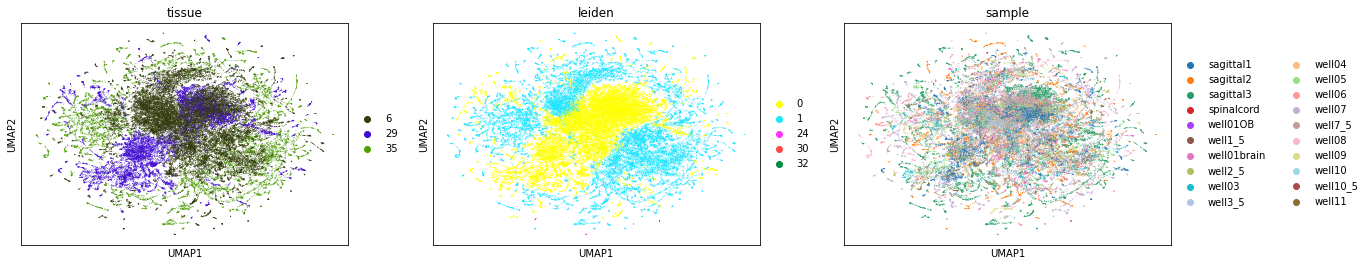

In [ ]:
sc.pl.umap(OB_merge,color=['tissue','leiden','sample'])

In [ ]:
focus_sample_names=['well10_5']#'well06','well01brain','well11','well2_5','sagittal1','sagittal2','sagittal3']

In [ ]:
adata1=adata_tissue_revise

In [ ]:
OB_merge.obs['leiden']=OB_merge.obs['leiden'].astype('str')
OB_merge.obs.loc[OB_merge.obs['leiden'].isin(['3','10','22','1','2','6','25','18','7','23','30','1','12','14','26','27','31','16','19','11','28','9']),'leiden']='1'
OB_merge.obs.loc[OB_merge.obs['leiden'].isin(['13','0','4','5','17','20','8','15','21','29','32','24']),'leiden']='0'

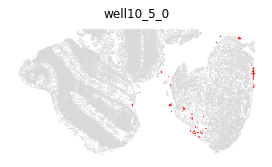

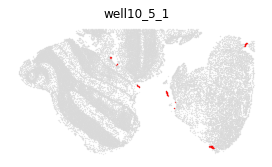

In [ ]:
for i in focus_sample_names:
  for j in OB_merge.obs['leiden'].unique():
    plt.figure(figsize=(max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/7000,max(adata1.obs.loc[adata1.obs['sample']== i,'col'])/7000,))
    plt.scatter(adata1.obs.loc[adata1.obs['sample']== i,'row'],adata1.obs.loc[adata1.obs['sample']== i,'col'],s=max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/600000,color=[0.85,0.85,0.85])

    adata1_id_j=OB_merge[OB_merge.obs['leiden']==j,:].copy()
    plt.scatter(adata1_id_j.obs.loc[adata1_id_j.obs['sample']== i,'row'],adata1_id_j.obs.loc[adata1_id_j.obs['sample']== i,'col'],s=max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/600000,color='red')
    plt.axis('off')
    plt.title(i+'_'+j)

In [ ]:
adata_tissue_revise.obs['revised_tissue'] = adata_tissue_revise.obs['revised_tissue'].astype('str')
adata_tissue_revise.obs.loc[OB_merge.obs.index,'revised_tissue']= OB_merge.obs['leiden'].apply(lambda x: 'Layer1+hippo-merge'+'_'+x)

19

In [ ]:
test=adata_tissue_revise.obs.loc[(adata_tissue_revise.obs['revised_tissue']=='19-merge') | (adata_tissue_revise.obs['revised_tissue']=='19_1') | (adata_tissue_revise.obs['revised_tissue']=='19_2'),:]

adata_tissue_revise.obs['revised_tissue'] = adata_tissue_revise.obs['revised_tissue'].astype('str')
adata_tissue_revise.obs.loc[test.index,'revised_tissue']= '19-merge'

13

In [ ]:
test=adata_tissue_revise.obs.loc[(adata_tissue_revise.obs['revised_tissue']=='13_0-merge') | (adata_tissue_revise.obs['revised_tissue']=='13_1') | (adata_tissue_revise.obs['revised_tissue']=='13_2'),:]

adata_tissue_revise.obs['revised_tissue'] = adata_tissue_revise.obs['revised_tissue'].astype('str')
adata_tissue_revise.obs.loc[test.index,'revised_tissue']= '13-merge'

Layer1+hippo-merge_0

In [ ]:
test=adata_tissue_revise.obs.loc[(adata_tissue_revise.obs['revised_tissue']=='Layer1+hippo-merge_0') ,:]

adata_tissue_revise.obs['revised_tissue'] = adata_tissue_revise.obs['revised_tissue'].astype('str')
adata_tissue_revise.obs.loc[test.index,'revised_tissue']= 'Layer1+hippo-merge_0'

In [ ]:
OB_merge=adata_tissue_revise[adata_tissue_revise.obs['revised_tissue']== 'Layer1+hippo-merge_0',:].copy()

In [ ]:
import scanpy.external as sce
sc.tl.pca(OB_merge)
sce.pp.harmony_integrate(OB_merge, 'sample')


2022-02-27 23:31:18,207 - harmonypy - INFO - Iteration 1 of 10
2022-02-27 23:31:39,063 - harmonypy - INFO - Iteration 2 of 10
2022-02-27 23:31:59,202 - harmonypy - INFO - Iteration 3 of 10
2022-02-27 23:32:20,751 - harmonypy - INFO - Iteration 4 of 10
2022-02-27 23:32:40,723 - harmonypy - INFO - Iteration 5 of 10
2022-02-27 23:32:56,013 - harmonypy - INFO - Converged after 5 iterations


In [ ]:
sc.pp.neighbors(OB_merge,use_rep='X_pca_harmony', n_neighbors=10, n_pcs=40)
sc.tl.umap(OB_merge)

In [ ]:
sc.tl.leiden(OB_merge,resolution=0.05)

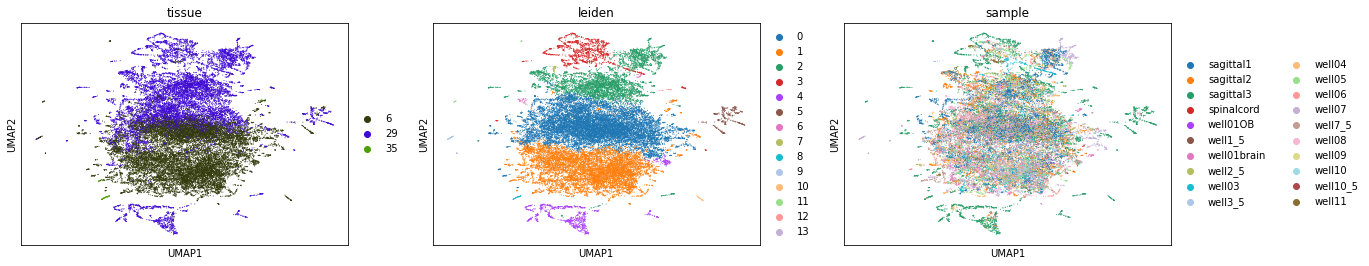

In [ ]:
sc.pl.umap(OB_merge,color=['tissue','leiden','sample'])

In [ ]:
focus_sample_names=['well11','sagittal1']

In [ ]:
adata1=adata_tissue_revise

In [ ]:
# OB_merge.obs['leiden']=OB_merge.obs['leiden'].astype('str')
# OB_merge.obs.loc[OB_merge.obs['leiden'].isin(['3','10','22','1','2','6','25','18','7','23','30','1','12','14','26','27','31','16','19','11','28','9']),'leiden']='1'
# OB_merge.obs.loc[OB_merge.obs['leiden'].isin(['13','0','4','5','17','20','8','15','21','29','32','24']),'leiden']='0'

In [ ]:
for i in focus_sample_names:
  for j in OB_merge.obs['leiden'].unique():
    plt.figure(figsize=(max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/7000,max(adata1.obs.loc[adata1.obs['sample']== i,'col'])/7000,))
    plt.scatter(adata1.obs.loc[adata1.obs['sample']== i,'row'],adata1.obs.loc[adata1.obs['sample']== i,'col'],s=max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/600000,color=[0.85,0.85,0.85])

    adata1_id_j=OB_merge[OB_merge.obs['leiden']==j,:].copy()
    plt.scatter(adata1_id_j.obs.loc[adata1_id_j.obs['sample']== i,'row'],adata1_id_j.obs.loc[adata1_id_j.obs['sample']== i,'col'],s=max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/600000,color='red')
    plt.axis('off')
    plt.title(i+'_'+j)

37

In [ ]:
test=adata_tissue_revise.obs.loc[(adata_tissue_revise.obs['revised_tissue']=='37_0') | (adata_tissue_revise.obs['revised_tissue']=='37_1') ,:]

adata_tissue_revise.obs['revised_tissue'] = adata_tissue_revise.obs['revised_tissue'].astype('str')
adata_tissue_revise.obs.loc[test.index,'revised_tissue']= '37-merge'

In [ ]:
OB_merge=adata_tissue_revise[adata_tissue_revise.obs['revised_tissue']== '37-merge',:].copy()

In [ ]:
import scanpy.external as sce
sc.tl.pca(OB_merge)
sce.pp.harmony_integrate(OB_merge, 'sample')


2022-02-27 23:35:48,897 - harmonypy - INFO - Iteration 1 of 10
2022-02-27 23:35:54,724 - harmonypy - INFO - Iteration 2 of 10
2022-02-27 23:36:00,591 - harmonypy - INFO - Iteration 3 of 10
2022-02-27 23:36:06,928 - harmonypy - INFO - Converged after 3 iterations


In [ ]:
sc.pp.neighbors(OB_merge,use_rep='X_pca_harmony', n_neighbors=10, n_pcs=40)
sc.tl.umap(OB_merge)

In [ ]:
sc.tl.leiden(OB_merge,resolution=0.01)

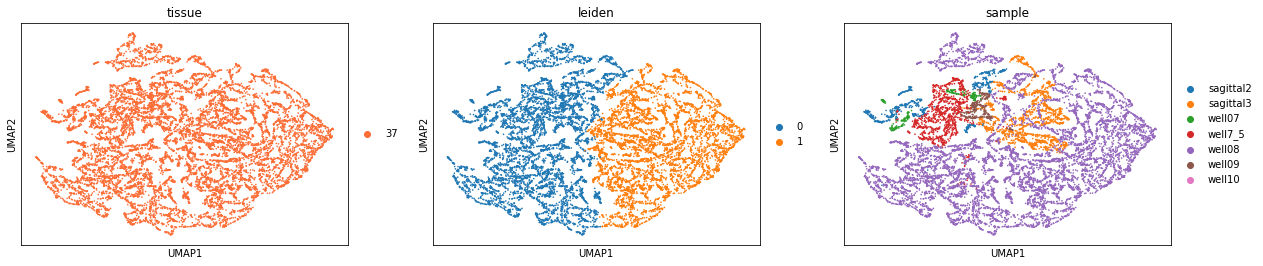

In [ ]:
sc.pl.umap(OB_merge,color=['tissue','leiden','sample'])

In [ ]:
focus_sample_names=['well07','well7_5','well08','well09','sagittal2','sagittal3']

In [ ]:
adata1=adata_tissue_revise

In [ ]:
# OB_merge.obs['leiden']=OB_merge.obs['leiden'].astype('str')
# OB_merge.obs.loc[OB_merge.obs['leiden'].isin(['3','10','22','1','2','6','25','18','7','23','30','1','12','14','26','27','31','16','19','11','28','9']),'leiden']='1'
# OB_merge.obs.loc[OB_merge.obs['leiden'].isin(['13','0','4','5','17','20','8','15','21','29','32','24']),'leiden']='0'

In [ ]:
for i in focus_sample_names:
  for j in OB_merge.obs['leiden'].unique():
    plt.figure(figsize=(max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/7000,max(adata1.obs.loc[adata1.obs['sample']== i,'col'])/7000,))
    plt.scatter(adata1.obs.loc[adata1.obs['sample']== i,'row'],adata1.obs.loc[adata1.obs['sample']== i,'col'],s=max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/600000,color=[0.85,0.85,0.85])

    adata1_id_j=OB_merge[OB_merge.obs['leiden']==j,:].copy()
    plt.scatter(adata1_id_j.obs.loc[adata1_id_j.obs['sample']== i,'row'],adata1_id_j.obs.loc[adata1_id_j.obs['sample']== i,'col'],s=max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/600000,color='red')
    plt.axis('off')
    plt.title(i+'_'+j)

... storing 'revised_tissue' as categorical


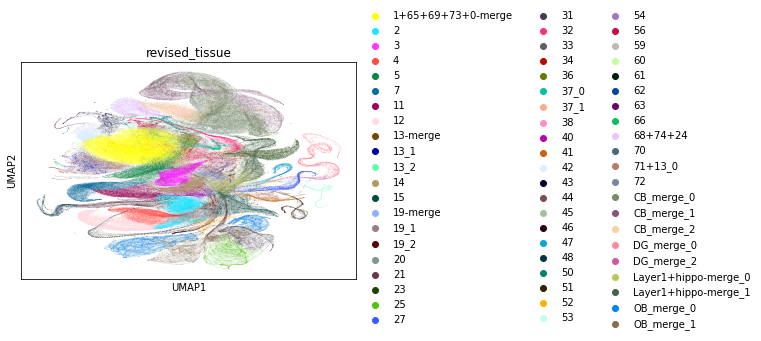

In [ ]:
sc.pl.umap(adata_tissue_revise,color='revised_tissue')

In [ ]:
adata_tissue_revise.write_h5ad('data/adata_tissue_revise.h5ad')

In [ ]:
adata_tissue_revise_before=sc.read_h5ad('data/tissue_region_revise.h5ad')


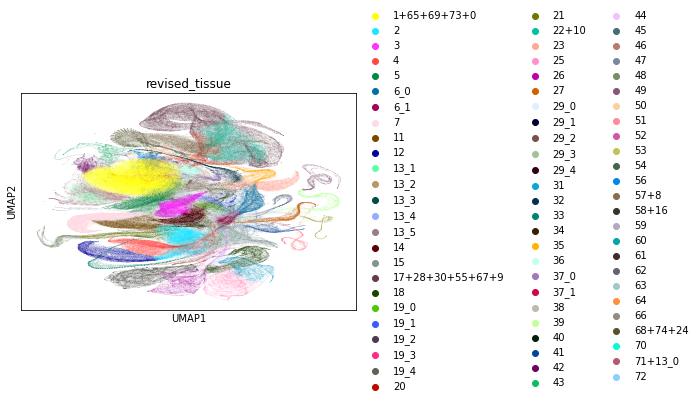

In [ ]:
sc.pl.umap(adata_tissue_revise_before,color='revised_tissue')

37

In [ ]:
adata_tissue_revise.obs['revised_tissue']=adata_tissue_revise.obs['revised_tissue'].astype('str')
adata_tissue_revise.obs.loc[adata_tissue_revise_before.obs['revised_tissue']=='37_0','revised_tissue']='37_0'

In [ ]:
adata_tissue_revise.obs.loc[adata_tissue_revise_before.obs['revised_tissue']=='37_1','revised_tissue']='37_1'

13

In [ ]:
adata_tissue_revise.obs.loc[adata_tissue_revise_before.obs['revised_tissue']=='19-merge','revised_tissue']='19-merge'
adata_tissue_revise.obs.loc[adata_tissue_revise_before.obs['revised_tissue']=='19_1','revised_tissue']='19_1'
adata_tissue_revise.obs.loc[adata_tissue_revise_before.obs['revised_tissue']=='19_2','revised_tissue']='19_2'

19

In [ ]:
adata_tissue_revise.obs.loc[adata_tissue_revise_before.obs['revised_tissue']=='13_0-merge','revised_tissue']='13_0-merge'
adata_tissue_revise.obs.loc[adata_tissue_revise_before.obs['revised_tissue']=='13_1','revised_tissue']='13_1'
adata_tissue_revise.obs.loc[adata_tissue_revise_before.obs['revised_tissue']=='13_2','revised_tissue']='13_2'

save

In [ ]:
adata_tissue_revise.obs

sample           col  ...  anatomical_region_id        revised_tissue
0        sagittal3  32050.916667  ...                   NaN                    45
1        sagittal3  31180.109375  ...                   NaN                    45
2        sagittal3  31231.711111  ...                   NaN                    45
3        sagittal3  31235.095238  ...                   NaN                    45
4        sagittal3  31441.180723  ...                   NaN                    45
...            ...           ...  ...                   ...                   ...
47602-7    well3_5  12529.654135  ...                   NaN                    34
47603-7    well3_5  12392.578512  ...                   NaN  Layer1+hippo-merge_0
47604-7    well3_5  12836.442308  ...                   NaN                    34
47605-7    well3_5  13028.637931  ...                   NaN                    34
47606-7    well3_5  12902.088235  ...                   NaN                    34

[1091527 rows x 8 columns]

find gene markers

In [ ]:
data_reshape=sc.read_h5ad('adata_celltype_tissuereshape.h5ad')

In [ ]:
data_reshape.obs['tissue']=list(adata_tissue_revise.obs['revised_tissue'])

In [ ]:
sc.tl.rank_genes_groups(data_reshape, 'tissue',method='t-test')

... storing 'tissue' as categorical


In [ ]:
markers = []
markers_pval_row=[]
markers_row=[]
temp = pd.DataFrame(data_reshape.uns['rank_genes_groups']['names']).head(5)
temp_score = pd.DataFrame(data_reshape.uns['rank_genes_groups']['scores']).head(5)
temp_pvale = pd.DataFrame(data_reshape.uns['rank_genes_groups']['pvals']).head(5)
for i in range(temp.shape[1]):
    curr_col = temp.iloc[:, i].to_list()
    curr_col_score = temp_score.iloc[:, i].to_list()
    curr_col_pvale=temp_pvale.iloc[:, i].to_list()
#     list_true=[x for x in curr_col_score]
#     curr_col=list(np.array(curr_col)[list_true])
#     curr_col_pvale=list(np.array(curr_col_pvale)[list_true])
    markers = markers + curr_col
    markers_row.append(curr_col)
    markers_pval_row.append(curr_col_pvale)
    print(i,temp.columns[i], curr_col)


0 1+65+69+73+0-merge ['TCF7L2', 'DOC2G', 'NR2F2', 'TH', 'LBP']
1 2 ['HPCAL4', 'NRGN', 'SLC17A7', 'CRYM', 'PRKCG']
2 3 ['ADCY1', 'SLC17A7', 'SATB2', 'CAR10', 'PKD2L1']
3 4 ['PKD2L1', 'GPR88', 'SCN4B', 'OTOA', 'RGS9']
4 5 ['HPCAL1', 'CBLN3', 'PKD2L1', 'PVALB', 'PRKCG']
5 6_0 ['PKD2L1', 'CREB3L1', 'ADCYAP1', 'KCNG1', 'PCP2']
6 6_1 ['SPARC', 'GLRA1', 'VAMP1', 'TSHZ2', 'SNCG']
7 7 ['SATB2', 'PKD2L1', 'NRGN', 'HPCAL4', 'SLC17A7']
8 11 ['GPR88', 'NRGN', 'HPCAL4', 'SCN4B', 'PKD2L1']
9 12 ['PKD2L1', 'OTOA', 'WNT4', 'ADCYAP1', 'ZFHX4']
10 13_0-merge ['SYT2', 'ADA', 'AQP4', 'VIM', 'ABI3BP']
11 13_1 ['CBLN3', 'NREP', 'NEUROD1', 'CBLN1', 'FAT2']
12 13_2 ['PROX1', 'C1QL2', 'NEFH', 'GLRA1', 'C1QL3']
13 14 ['NEUROD1', 'CBLN3', 'ZIC1', 'FAT2', 'NPTX1']
14 15 ['BAIAP3', 'SPARC', 'CNPY1', 'CBLN3', 'GPRASP2']
15 17+28+30+55+67+9 ['PPP1R1B', 'RGS9', 'GRM5', 'SCN4B', 'GPR88']
16 19-merge ['NREP', 'CBLN3', 'CBLN1', 'NEUROD1', 'FAT2']
17 19_1 ['CBLN3', 'NEUROD1', 'SLC17A7', 'NREP', 'TIAM1']
18 19_2 ['NDRG2', 

In [ ]:
sc.pl.dotplot(data_reshape,markers,groupby='tissue',swap_axes=True)

Output hidden; open in https://colab.research.google.com to view.

heatmap

In [ ]:
pd_celltype_region=pd.read_csv('output_data/numbers/all_samples_Rank5_Symbol_num.csv')

In [ ]:
pd_celltype_region

tissue_id   AC_1  AC_2  AC_3  AC_4  ...  VL1  VL2  VLM_1  VLM_2  VSM_1
0           0  11886  1216   256    23  ...   71  157    572     46    804
1           1   9101   713    85    16  ...   51   86    514     26    954
2           2    487  2379  1638     6  ...   17   15    221     14    335
3           3    191  1602   781     9  ...   11    7    146      7    320
4           4    258  2030  1085    10  ...   16  260    201     46    317
..        ...    ...   ...   ...   ...  ...  ...  ...    ...    ...    ...
70         70      0     3     2     0  ...    0    0      0      0      0
71         71      4     0     0     0  ...    1    1      0      0      0
72         72      0     0     0     1  ...    1    0      1      2      0
73         73     12     2     1     0  ...    0    0      0      0      0
74         74      0     0     0     0  ...    0    0      0      0      0

[75 rows x 232 columns]

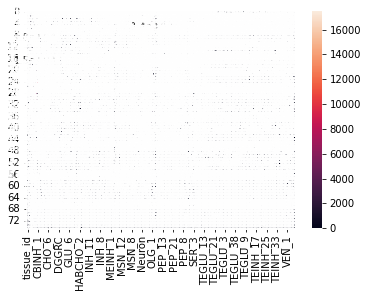

In [ ]:
# import numpy as np 
# from pandas import DataFrame
# import seaborn as sns
# %matplotlib inline

# Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
# Cols = ['A', 'B', 'C', 'D']
# df = DataFrame(abs(np.random.randn(5, 4)), index=Index, columns=Cols)

sns.heatmap(pd_celltype_region, annot=True)

In [ ]:
cost = np.array(pd_celltype_region)
from scipy.optimize import linear_sum_assignment
cost=1/cost
row_ind, col_ind = linear_sum_assignment(cost)

In [ ]:
cost = np.array(pd_celltype_region)

In [ ]:
cost.shape

(75, 232)

In [ ]:
col_ind.shape

(75,)

In [ ]:
final_cost=cost[:,col_ind]

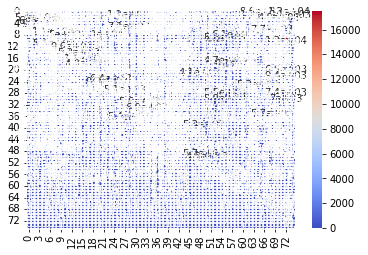

In [ ]:
sns.heatmap(final_cost, annot=True,cmap='coolwarm')

In [ ]:
final_cost

array([[ 2915,   424,     2, ...,    17, 11886,     0],
       [ 1251,  2422,     0, ...,    20,  9101,     1],
       [   17,     1,  5378, ...,     7,   487,     2],
       ...,
       [    0,     0,     0, ...,    11,     0,    72],
       [    0,     0,     0, ...,     0,    12,    73],
       [    0,     0,     0, ...,     0,     0,    74]])

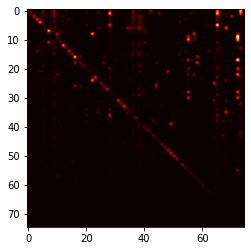

In [ ]:
plt.figure()
plt.imshow(final_cost, cmap='hot')


In [ ]:
data_reshape=data[list(adata1.obs['index'].astype('str')),:].copy()

In [ ]:
data_reshape.obs['tissue']=list(adata1.obs['tissue'])

In [ ]:
sc.tl.rank_genes_groups(data_reshape, 'tissue',method='t-test')

... storing 'tissue' as categorical


In [ ]:
markers = []
markers_pval_row=[]
markers_row=[]
temp = pd.DataFrame(data_reshape.uns['rank_genes_groups']['names']).head(5)
temp_score = pd.DataFrame(data_reshape.uns['rank_genes_groups']['scores']).head(5)
temp_pvale = pd.DataFrame(data_reshape.uns['rank_genes_groups']['pvals']).head(5)
for i in range(temp.shape[1]):
    curr_col = temp.iloc[:, i].to_list()
    curr_col_score = temp_score.iloc[:, i].to_list()
    curr_col_pvale=temp_pvale.iloc[:, i].to_list()
#     list_true=[x for x in curr_col_score]
#     curr_col=list(np.array(curr_col)[list_true])
#     curr_col_pvale=list(np.array(curr_col_pvale)[list_true])
    markers = markers + curr_col
    markers_row.append(curr_col)
    markers_pval_row.append(curr_col_pvale)
    print(i, curr_col)


# set tissue id = 0

In [ ]:
focus_tissue_id=10

adata1_id=adata1[adata1.obs['tissue']==str(focus_tissue_id),:].copy()
print(f'cell num:{adata1_id.shape[0]}')

cell num:27432


### if further split, running the following

input samples you want to check

In [ ]:
focus_sample_names=['sagittal2','sagittal3','well7_5']

#### 1. plot samples

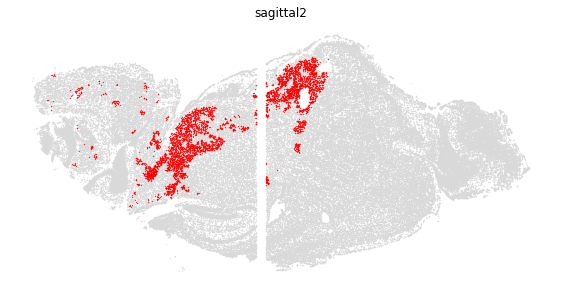

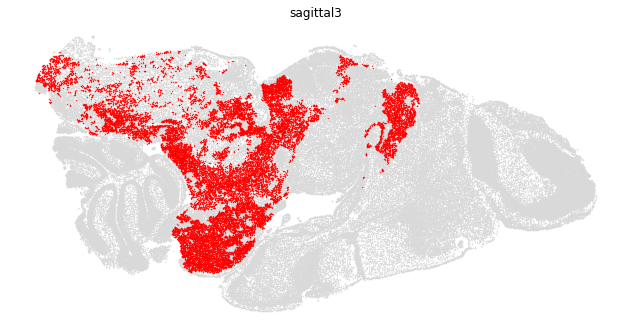

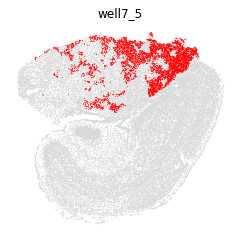

In [ ]:
for i in focus_sample_names:
  plt.figure(figsize=(max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/7000,max(adata1.obs.loc[adata1.obs['sample']== i,'col'])/7000,))
  plt.scatter(adata1.obs.loc[adata1.obs['sample']== i,'row'],adata1.obs.loc[adata1.obs['sample']== i,'col'],s=max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/600000,color=[0.85,0.85,0.85])

  plt.scatter(adata1_id.obs.loc[adata1_id.obs['sample']== i,'row'],adata1_id.obs.loc[adata1_id.obs['sample']== i,'col'],s=max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/600000,color='red')
  plt.axis('off')
  plt.title(i)

#### 2. split and compare umap

split method 1

In [ ]:
#split,resolution higher-> more cluster
sc.tl.leiden(adata1_id,resolution=0.1)

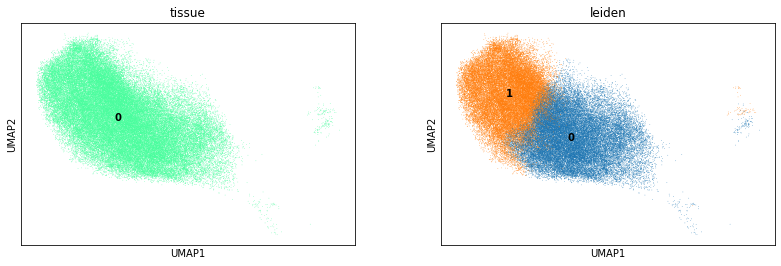

In [ ]:
sc.pl.umap(adata1_id,color=['tissue','leiden'],legend_loc='on data')

split method 2 - may be slow

In [ ]:
sc.tl.pca(adata1_id, svd_solver='arpack')
sc.pp.neighbors(adata1_id, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata1_id)

In [ ]:
sc.tl.leiden(adata1_id,resolution=0.005)

In [ ]:
sc.pl.umap(adata1_id,color=['tissue','leiden'],legend_loc='on data')

split method 3 - slow!

In [ ]:
# cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean', linkage='ward')
# adata1_id.obs['leiden'] = cluster.fit_predict(adata1_id.obsm['X_pca']).astype(str)

In [ ]:
# sc.pl.umap(adata1_id,color=['tissue','leiden'],legend_loc='on data')

#### 3. plot samples after split

In [ ]:
for i in focus_sample_names:
  for j in adata1_id.obs['leiden'].unique():
    plt.figure(figsize=(max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/7000,max(adata1.obs.loc[adata1.obs['sample']== i,'col'])/7000,))
    plt.scatter(adata1.obs.loc[adata1.obs['sample']== i,'row'],adata1.obs.loc[adata1.obs['sample']== i,'col'],s=max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/600000,color=[0.85,0.85,0.85])

    adata1_id_j=adata1_id[adata1_id.obs['leiden']==j,:].copy()
    plt.scatter(adata1_id_j.obs.loc[adata1_id_j.obs['sample']== i,'row'],adata1_id_j.obs.loc[adata1_id_j.obs['sample']== i,'col'],s=max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/600000,color='red')
    plt.axis('off')
    plt.title(i+'_'+j)

#### 4. if you are satisfied with further splitting and want to save it 

In [ ]:
adata1_new.obs['revised_tissue'] = adata1_new.obs['revised_tissue'].astype('str')
adata1_new.obs.loc[adata1_id.obs.index,'revised_tissue']= adata1_id.obs['leiden'].apply(lambda x: str(focus_tissue_id)+'_'+x)

### if combine with another tissue region

In [ ]:
combine_tissue_id=['22']        

adata1_id_combine=adata1[adata1.obs['tissue'].isin(combine_tissue_id),:].copy()

input samples you want to check

In [ ]:
focus_sample_names=['sagittal3','well09']

#### 1. plot samples with two tissue regions

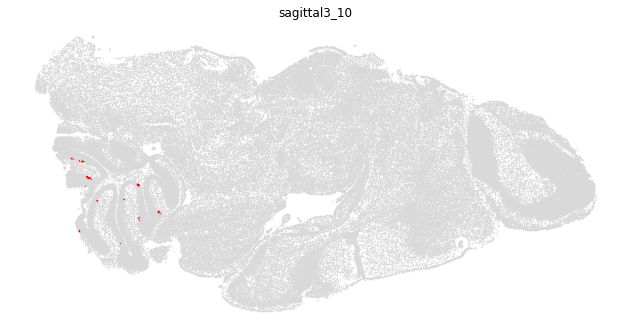

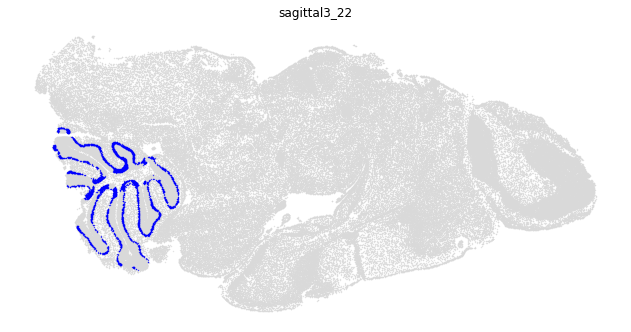

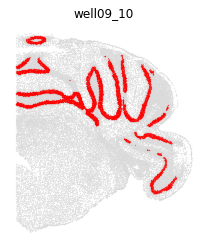

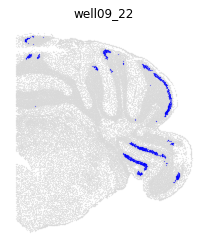

In [ ]:
for i in focus_sample_names:
  plt.figure(figsize=(max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/7000,max(adata1.obs.loc[adata1.obs['sample']== i,'col'])/7000,))
  plt.scatter(adata1.obs.loc[adata1.obs['sample']== i,'row'],adata1.obs.loc[adata1.obs['sample']== i,'col'],s=max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/600000,color=[0.85,0.85,0.85])

  plt.scatter(adata1_id.obs.loc[adata1_id.obs['sample']== i,'row'],adata1_id.obs.loc[adata1_id.obs['sample']== i,'col'],s=max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/800000,color='red')
  plt.axis('off')
  plt.title(i+'_'+str(focus_tissue_id))


  for j in combine_tissue_id:
    adata1_id_plot=adata1[adata1.obs['tissue']==j,:].copy()
    plt.figure(figsize=(max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/7000,max(adata1.obs.loc[adata1.obs['sample']== i,'col'])/7000,))
    plt.scatter(adata1.obs.loc[adata1.obs['sample']== i,'row'],adata1.obs.loc[adata1.obs['sample']== i,'col'],s=max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/600000,color=[0.85,0.85,0.85])

    plt.scatter(adata1_id_plot.obs.loc[adata1_id_plot.obs['sample']== i,'row'],adata1_id_plot.obs.loc[adata1_id_plot.obs['sample']== i,'col'],s=max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/800000,color='blue')

    plt.axis('off')
    plt.title(i+'_'+str(j)) 


#### 2. combine two regions and plot samples

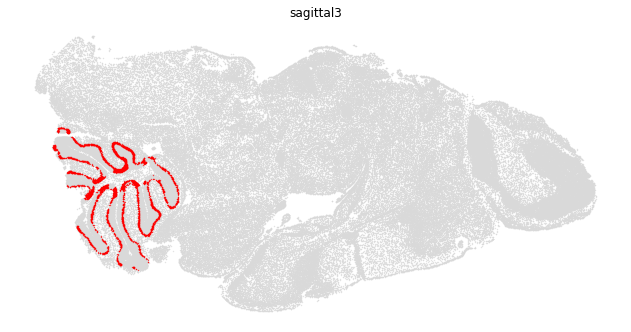

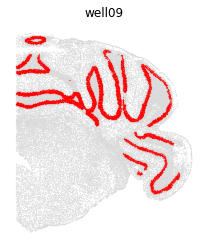

In [ ]:
for i in focus_sample_names:
  test=adata1_new[adata1_new.obs['revised_tissue']==str(combine_tissue_id)+'+'+str(focus_tissue_id),:].copy()
  plt.figure(figsize=(max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/7000,max(adata1.obs.loc[adata1.obs['sample']== i,'col'])/7000,))
  plt.scatter(adata1.obs.loc[adata1.obs['sample']== i,'row'],adata1.obs.loc[adata1.obs['sample']== i,'col'],s=max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/600000,color=[0.85,0.85,0.85])
  plt.scatter(adata1_id.obs.loc[adata1_id.obs['sample']== i,'row'],adata1_id.obs.loc[adata1_id.obs['sample']== i,'col'],s=max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/800000,color='red')
  plt.scatter(adata1_id_combine.obs.loc[adata1_id_combine.obs['sample']== i,'row'],adata1_id_combine.obs.loc[adata1_id_combine.obs['sample']== i,'col'],s=max(adata1.obs.loc[adata1.obs['sample']== i,'row'])/800000,color='red')

  plt.axis('off')
  plt.title(i)

#### 3. save combined results

In [ ]:
adata1_new.obs['revised_tissue'] = adata1_new.obs['revised_tissue'].astype('str')
adata1_new.obs.loc[adata1_id.obs.index,'revised_tissue']= '+'.join(combine_tissue_id)+'+'+str(focus_tissue_id)
adata1_new.obs.loc[adata1_id_combine.obs.index,'revised_tissue']= '+'.join(combine_tissue_id)+'+'+str(focus_tissue_id)

# save results

In [ ]:
adata1_new.write_h5ad('tissue_region_revise.h5ad')

... storing 'revised_tissue' as categorical
